In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')


In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
# drop unnecesaary column

df_index.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [10]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
# check null value

df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

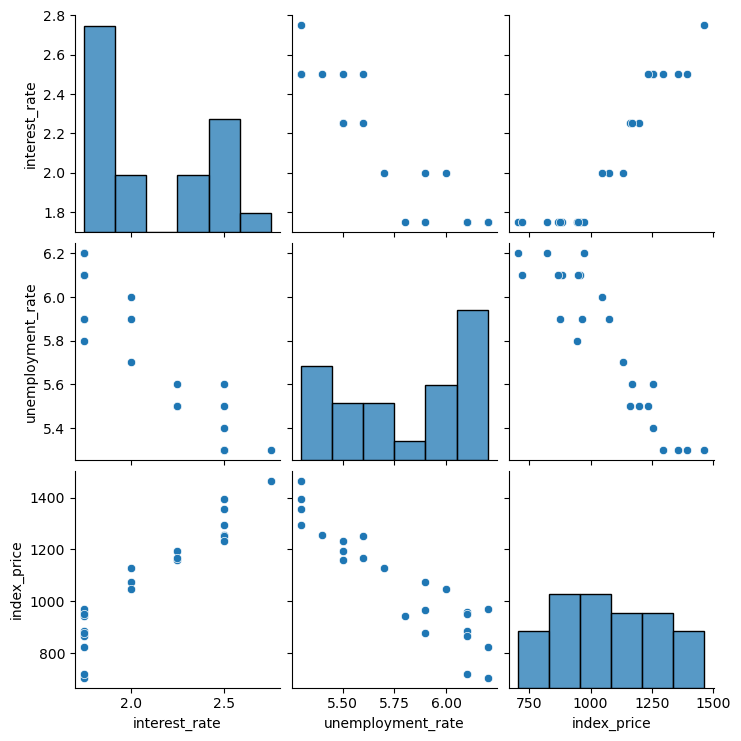

In [14]:
# lets do some visualization

import seaborn as sns
sns.pairplot(df_index)

In [18]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

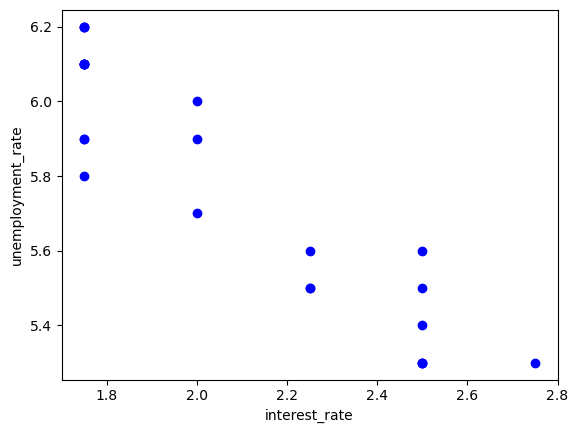

In [19]:
# lets visualize more
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='b')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [21]:
# independent and dependent variable

x=df_index.iloc[:,:-1] # take all the rows and minus the last column
y=df_index["index_price"] # iloc[:,-1] -> onl.y take the last column

In [22]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [23]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [24]:
# train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

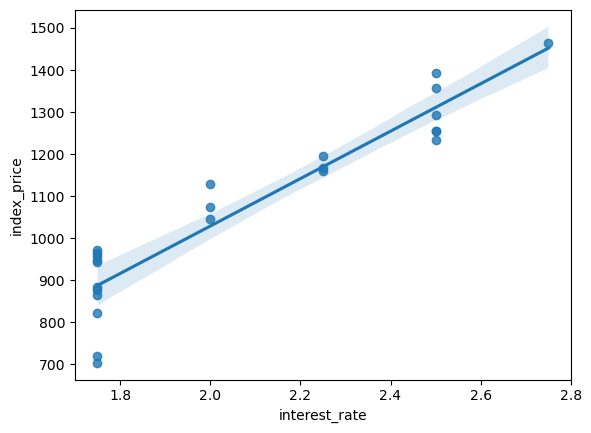

In [31]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

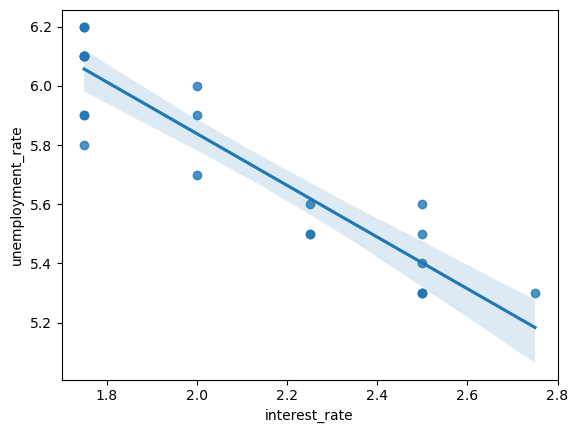

In [32]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

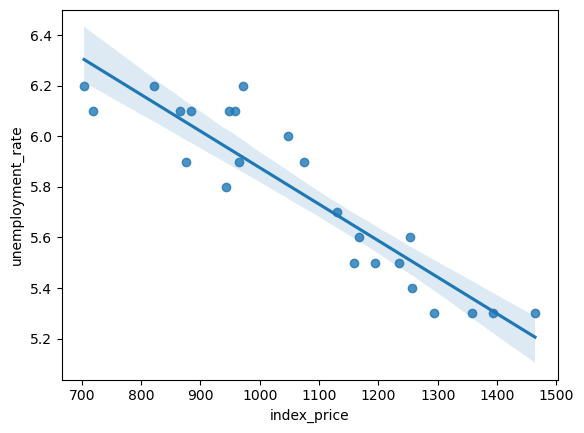

In [33]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)


In [35]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [38]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [41]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [43]:
np.mean(validation_score)

np.float64(-5914.828180162396)

In [45]:
y_pred=regression.predict(x_test)

In [46]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [47]:
# performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.7628877125835
59.9357815232356
76.11677139574815


In [48]:
# r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457141


In [49]:
# display adjusted r square

1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


0.7131630152428567

# Assumptions


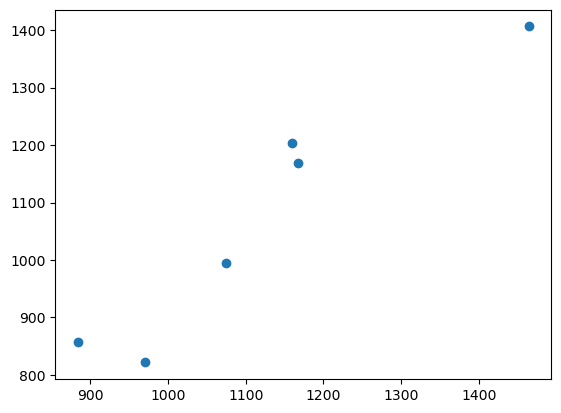

In [50]:
plt.scatter(y_test,y_pred)

In [52]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


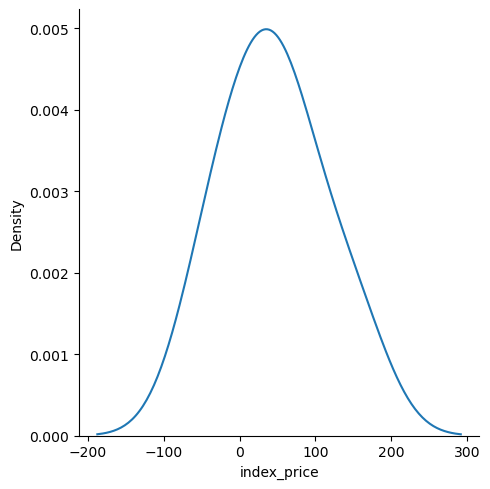

In [53]:
 # plot this residuals
sns.displot(residuals,kind='kde')

# this type of plot says it is a good model

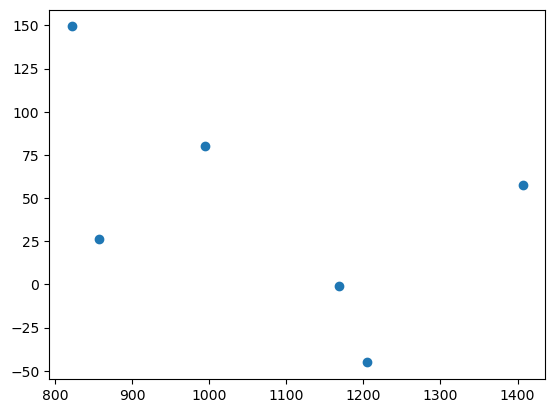

In [54]:
# create a scatteer plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)


# it follows uniform distribution it means the model does not have any problem


In [55]:
# OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                       0.754
Time:                        21:35:48   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/bluemishu/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [56]:
print(regression.coef_)

[  88.27275507 -116.25716066]
